In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter

# Download latest version
path = kagglehub.dataset_download("sakshisatre/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\sakshisatre\titanic-dataset\versions\2


In [2]:
df = pd.read_csv(path+'\\Titanic_Dataset.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df3 = df

df3 = df3.drop('name', axis=1)
df3 = df3.drop('ticket', axis=1)
df3 = df3.drop('cabin', axis=1)
df3 = df3.drop('boat', axis=1)
df3 = df3.drop('body', axis=1)
df3 = df3.drop('home.dest', axis=1)
df3['age'] = df3['age'].fillna(df3['age'].dropna().mean())
df3 = df3.dropna(subset=['embarked'])
df3 = df3.dropna(subset=['fare'])
df3['embarked_C'] = df3['embarked'].map({'C': 1, 'Q': 0, 'S': 0}) #C = Cherbourg, Q = Queenstown, S = Southampton.
df3['embarked_Q'] = df3['embarked'].map({'C': 0, 'Q': 1, 'S': 0}) #C = Cherbourg, Q = Queenstown, S = Southampton.
df3['embarked_S'] = df3['embarked'].map({'C': 0, 'Q': 0, 'S': 1}) #C = Cherbourg, Q = Queenstown, S = Southampton.
df3 = df3.drop('embarked', axis=1)
df3['fare'] = df3['fare'] / 30 # 30 - как среднее
df3['age'] = df3['age'] / 30 # 30 - как среднее
df3['sex'] = df3['sex'].map({'male': 1, 'female': 0})

df3

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,0.966667,0,0,7.044583,0,0,1
1,1,1,1,0.030667,1,2,5.051667,0,0,1
2,1,0,0,0.066667,1,2,5.051667,0,0,1
3,1,0,1,1.000000,1,2,5.051667,0,0,1
4,1,0,0,0.833333,1,2,5.051667,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,0.483333,1,0,0.481807,1,0,0
1305,3,0,0,0.996038,1,0,0.481807,1,0,0
1306,3,0,1,0.883333,0,0,0.240833,1,0,0
1307,3,0,1,0.900000,0,0,0.240833,1,0,0


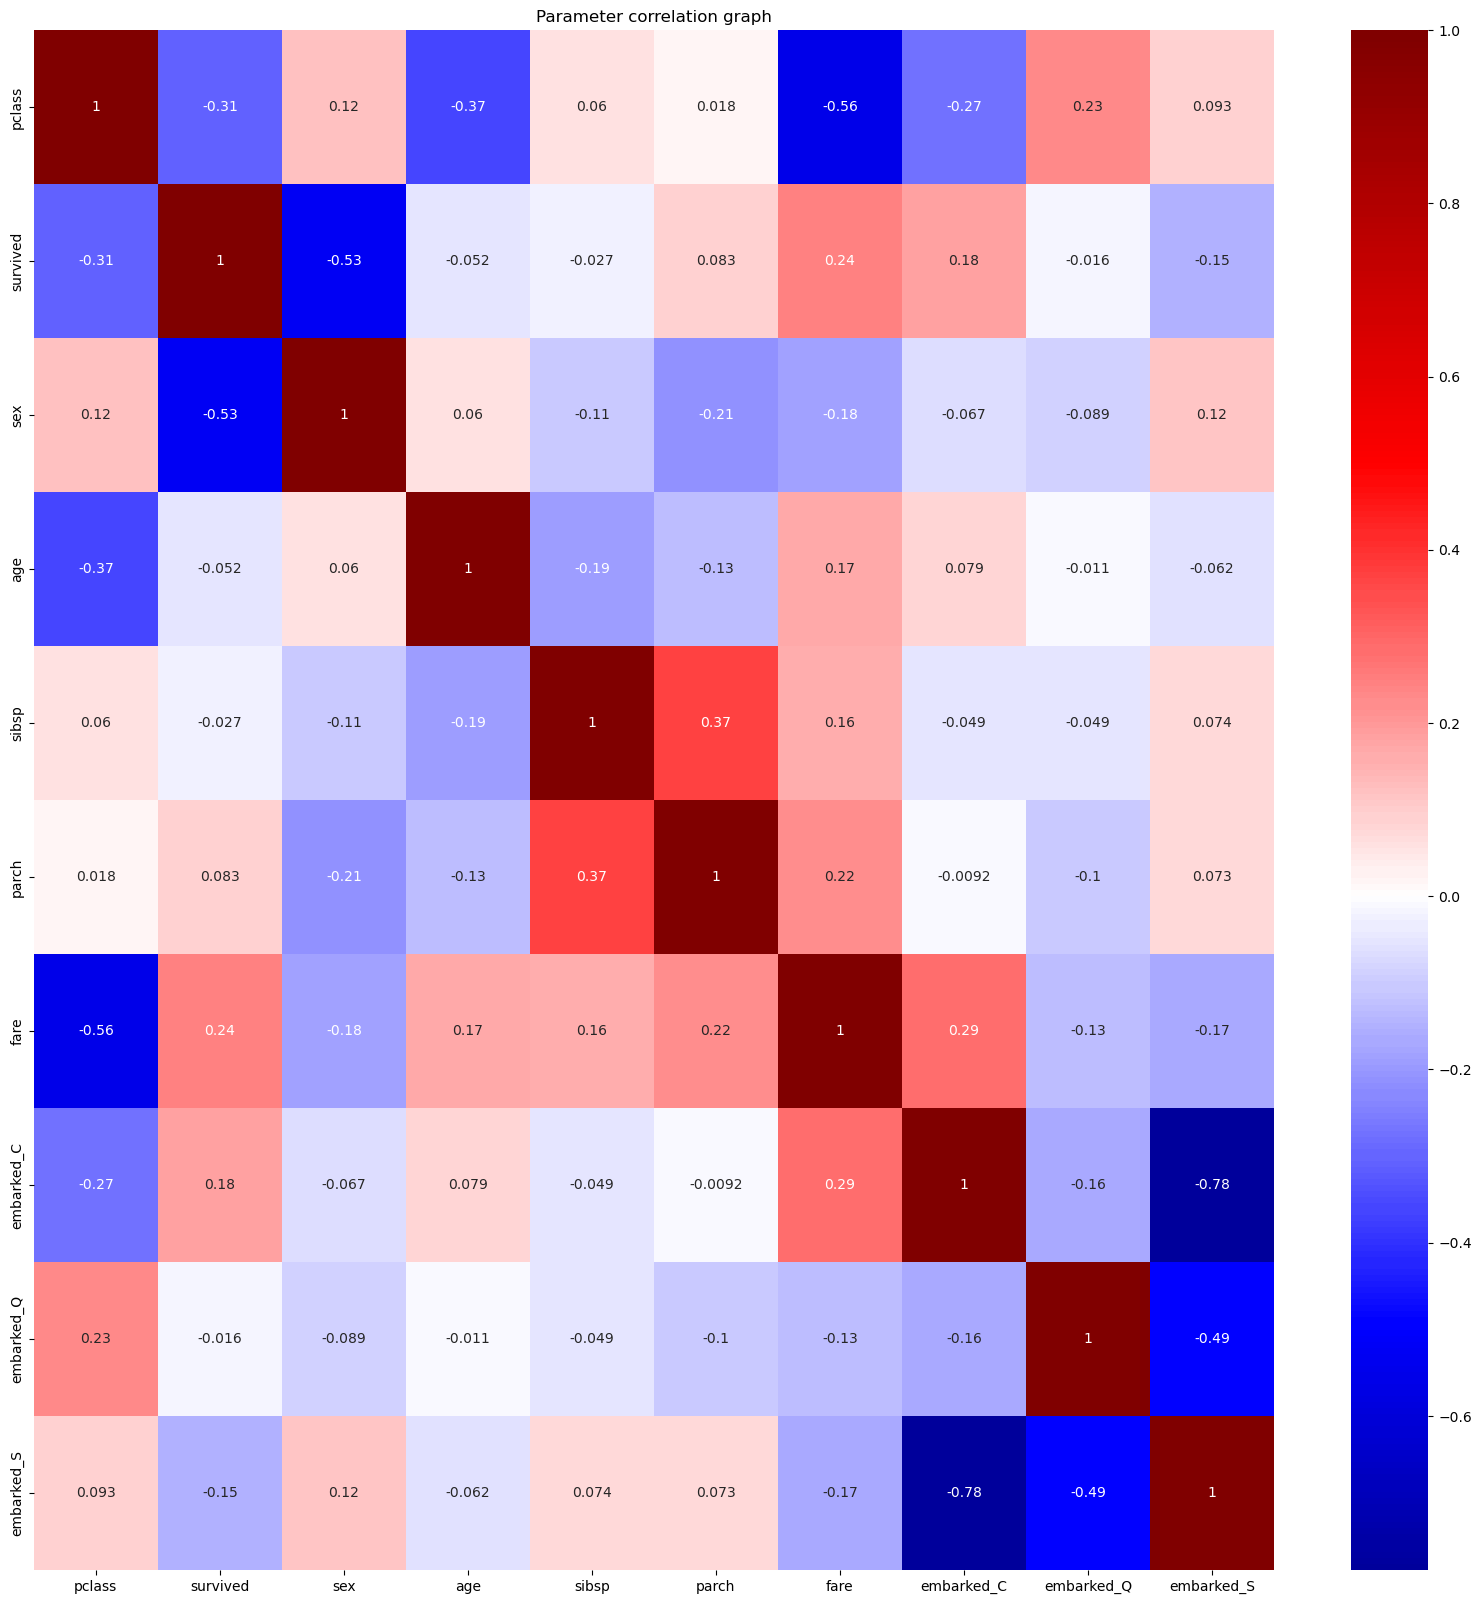

In [4]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(df3.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [25]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category = UserWarning, message = "KMeans is known to have a memory leak on Windows with MKL")

arr_score = []

for i in range(2, 30):
    X = df3.to_numpy()
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto", max_iter = 500).fit(X)
    score = kmeans.inertia_
    arr_score.append(score)

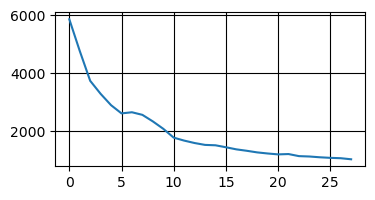

In [26]:
plt.figure(figsize = (4, 2))
plt.plot(arr_score, '-')
plt.grid(True, color = 'k')

In [27]:
residual_arr = []

for i in range(len(arr_score) - 1):
    res = arr_score[i+1] - arr_score[i]
    residual_arr.append(res)

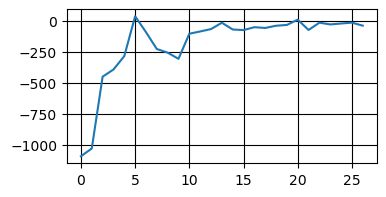

In [28]:
plt.figure(figsize = (4, 2))
plt.plot(residual_arr, '-')
plt.grid(True, color = 'k')

In [9]:
#в данном случае метод локтя работает не очень хорошо, поэтому выбираем n_clusters = 5

X = df3.to_numpy()
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init = "auto", max_iter = 500).fit(X)
arr_score.append(score)
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [10]:
arr_points = []

for i in range(10):
    temp = []
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            temp.append(X[j])
    arr_points.append(temp)

In [11]:
col_lst = df3.columns

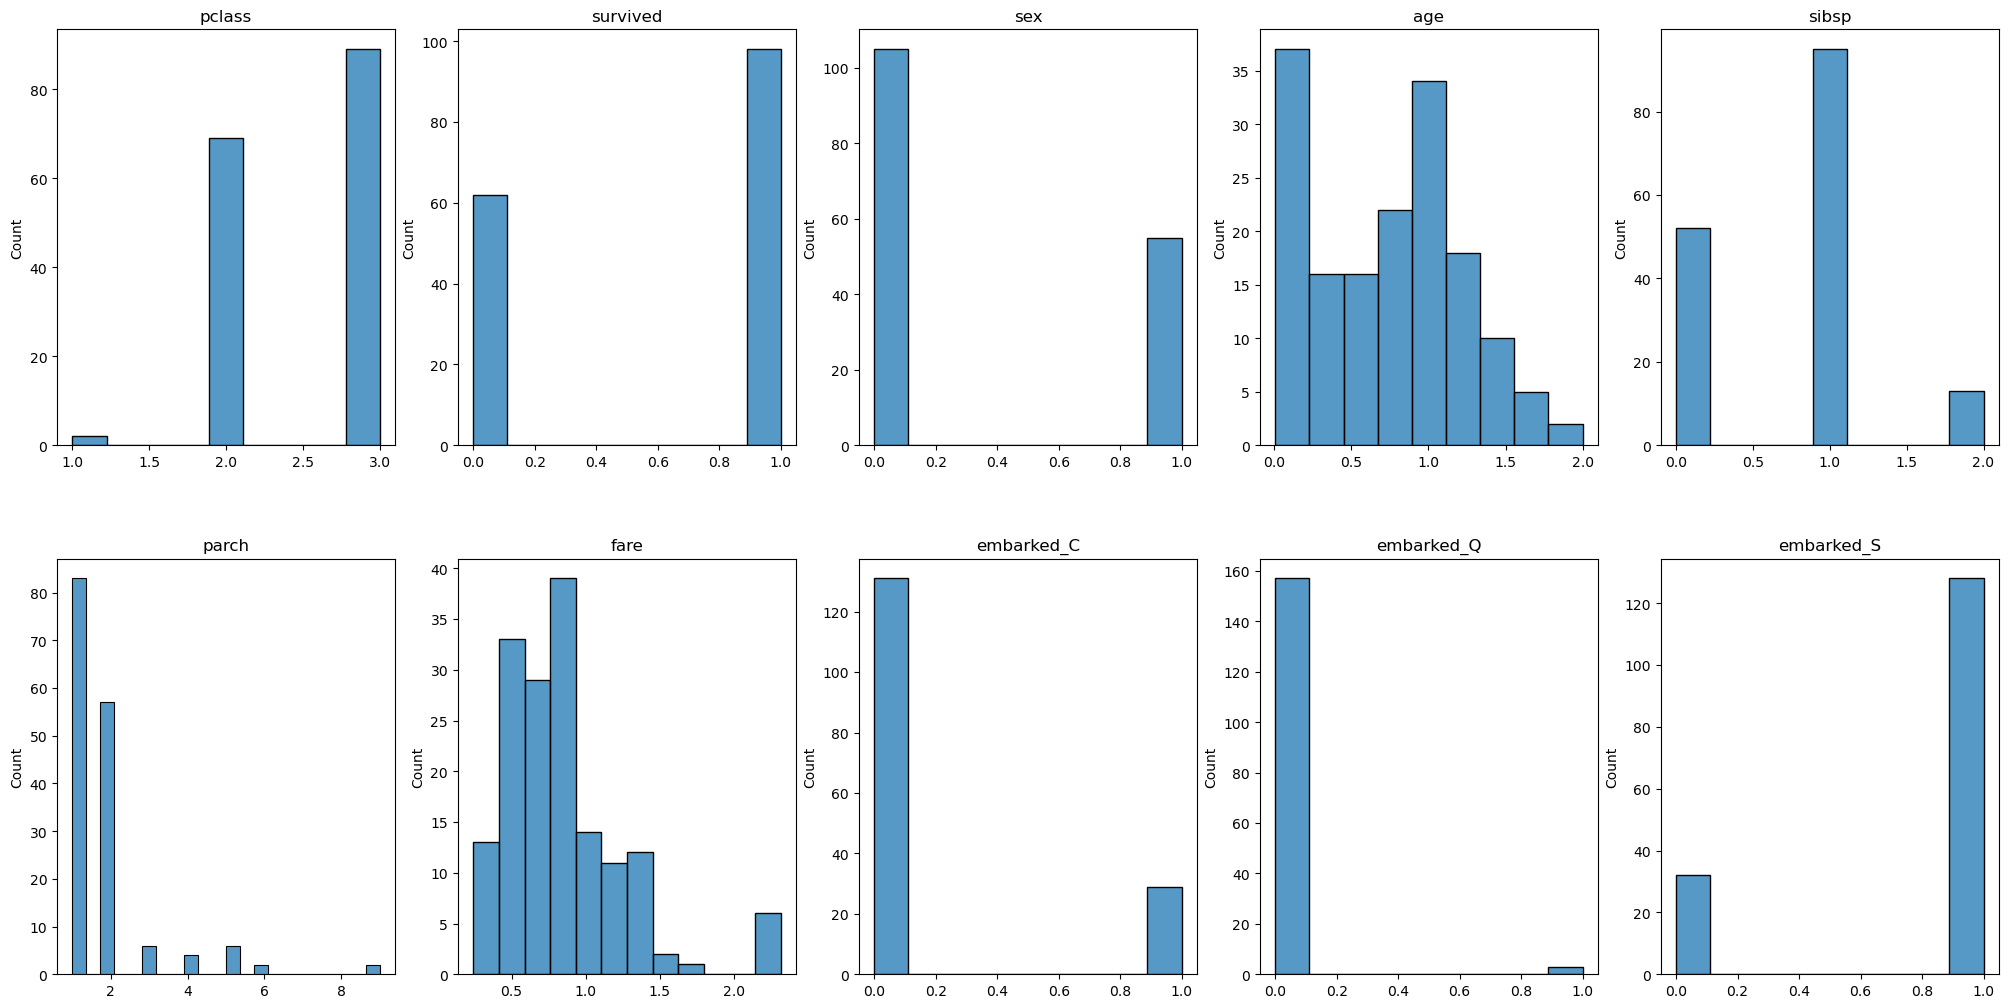

In [12]:
arr = np.array(arr_points[4])

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for i in range(arr.shape[1]):
    seaborn.histplot(arr[:, i], ax=axs[i])
    axs[i].set_title(col_lst[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [13]:
col_lst_v2 = df3.drop(['embarked_Q', 'embarked_S'], axis=1).columns

In [14]:
for i in range(5):
    arr = np.array(arr_points[i])
    print(f"---кластер №{i}---")
    for j in range(len(col_lst_v2)):
        if col_lst_v2[j] == 'embarked_C':
            lab = {0 : 'C', 1 : 'Q', 2: 'S'}
            embarked = [Counter(arr[:, j]), Counter(arr[:, j + 1]), Counter(arr[:, j + 2])]
            embarked_m_count = []
            for k in range(3):
                embarked_m_count.append(embarked[k][1])
            embarked_m_count.sort(reverse=True)
            ratio = embarked_m_count[0] / embarked_m_count[1]
            if ratio > 2:
                for k in range(3):
                    if embarked_m_count[0] == embarked[k][1]:
                        print(f"основной признак embarked: параметр {lab[k]}")

        elif col_lst_v2[j] in ['survived', 'sex', 'age', 'fare', 'pclass', 'sibsp', 'parch']:
            arr_frec = Counter(arr[:, j])
            most_common_items = arr_frec.most_common()
            if len(most_common_items) == 2:
                element1, count1 = most_common_items[0]
                element2, count2 = most_common_items[1]
                ratio = count1 / count2
                if ratio >= 2:
                    print(f"основной признак {col_lst_v2[j]}: параметр {element1}")
            elif len(most_common_items) == 1:
                element1, count1 = most_common_items[0] 
                print(f"основной признак {col_lst_v2[j]}: параметр {element1}")
            elif len(most_common_items) >= 2:
                arr_el = []
                arr_count = []
                for k in range(len(most_common_items)):
                    element0, count0 = most_common_items[k]
                    if col_lst_v2[j] in ['age', 'fare']:
                        arr_el.append(round(float(element0) * 30, 3))
                    else:
                        arr_el.append(round(float(element0), 3))
                    arr_count.append(count0)
                k_max = 1 + round(0.25 * len(most_common_items))
                arr_el_final = []
                for k in range(k_max):
                    sum_left = 0
                    sum_right = 0
                    for t in range(k + 1):
                        sum_left += arr_count[t]
                    for t in range(k + 1, k_max + 1):
                        sum_right += arr_count[t]
                    ratio = sum_left / sum_right
                    arr_el_final.append(arr_el[k])
                    if ratio > 2:
                        print(f"основной признак {col_lst_v2[j]}: параметры {arr_el_final}")
                        break

---кластер №0---
основной признак pclass: параметры [3.0]
основной признак survived: параметр 0.0
основной признак sex: параметр 1.0
основной признак age: параметры [29.881, 22.0, 21.0, 24.0, 30.0, 28.0, 25.0, 18.0, 19.0]
основной признак sibsp: параметры [0.0]
основной признак parch: параметр 0.0
основной признак fare: параметры [8.05, 13.0, 7.75, 7.896, 10.5, 26.0, 7.775, 7.229, 7.925, 7.854, 7.225, 8.662]
основной признак embarked: параметр S
---кластер №1---
основной признак pclass: параметр 1.0
основной признак age: параметры [50.0, 35.0, 29.0, 30.0, 18.0, 24.0, 45.0]
основной признак sibsp: параметры [0.0, 1.0]
основной признак parch: параметры [0.0, 2.0]
основной признак fare: параметры [262.375, 263.0, 227.525, 211.5]
---кластер №2---
основной признак pclass: параметр 1.0
основной признак age: параметры [29.881, 36.0, 45.0, 30.0, 48.0, 24.0, 35.0, 47.0, 22.0, 39.0]
основной признак sibsp: параметры [0.0, 1.0]
основной признак parch: параметры [0.0]
основной признак fare: параме

In [16]:
#при сравнении анализа кластеров с графиками выше видно, что признаки fare и age плохо коррелируют между собой, что, 
#возможно, требует введения параметра окрестности для данных признаков

In [47]:
class my_KMeans:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-3):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        
    def initialize_centroids(self, X):
        np.random.seed(42)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]
    
    def compute_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for iteration in range(self.max_iters):
            distances = self.compute_distances(X, self.centroids)
            self.labels = np.argmin(distances, axis=1)

            old_centroids = self.centroids.copy()
            for i in range(self.n_clusters):
                self.centroids[i] = X[self.labels == i].mean(axis=0)
            
            centroid_shift = np.linalg.norm(old_centroids - self.centroids)
            if centroid_shift < self.tol:
                break
                
        return self
    
    def predict(self, X):
        distances = self.compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)
    
    def get_labels(self):
        return self.labels

    def score(self):
        distances = self.compute_distances(X, self.centroids)
        return np.sum((np.min(distances, axis=1))**2)


In [48]:
my_arr_score = []

X = df3.to_numpy()
for i in range(2, 30):
    model = my_KMeans(n_clusters = i, max_iters = 300, tol = 1e-2).fit(X)
    my_arr_score.append(model.score())

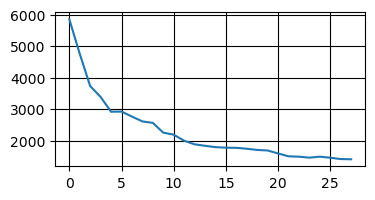

In [49]:
plt.figure(figsize = (4, 2))
plt.plot(my_arr_score, '-')
plt.grid(True, color = 'k')

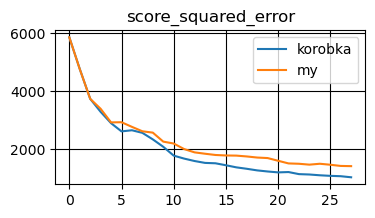

In [53]:
plt.figure(figsize=(4, 2))
plt.title('score_squared_error')
plt.plot(arr_score, '-', label = 'korobka')
plt.plot(my_arr_score, '-', label = 'my')
plt.legend()
plt.grid(True, color = 'k')